In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [42]:
DATA_PATH = '/content/drive/MyDrive/data.csv'

TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 1 - TRAIN_RATIO - VALIDATION_RATIO

DATA_DEST_PATH = '/content/drive/MyDrive/forecasting/'
DATA_VERSION = 'v1'

In [7]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

tf.random.set_seed(42)
np.random.seed(42)


In [9]:
df = pd.read_csv(DATA_PATH)
df.head()

,year,month,day,hour,minute,open,close,high,low,EMA20,EMA60,EMA100,EMA200,RSI,ADX
0,2018,10,1,0,5,1192.20,1191.86,1192.35,1191.33,1191.6699,1191.3690,1190.3571,1188.5916,52.78,23.06
1,2018,10,1,0,10,1191.99,1191.80,1191.99,1191.69,1191.6823,1191.3832,1190.3857,1188.6236,51.55,21.57
2,2018,10,1,0,15,1191.77,1191.78,1192.00,1191.71,1191.6916,1191.3962,1190.4133,1188.6550,51.13,20.22
3,2018,10,1,0,20,1191.77,1191.89,1191.89,1191.41,1191.7105,1191.4124,1190.4425,1188.6871,53.41,19.45
4,2018,10,1,0,25,1191.91,1191.70,1192.06,1191.70,1191.7095,1191.4218,1190.4674,1188.7171,49.14,18.21


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451907 entries, 0 to 451906
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    451907 non-null  int64  
 1   month   451907 non-null  int64  
 2   day     451907 non-null  int64  
 3   hour    451907 non-null  int64  
 4   minute  451907 non-null  int64  
 5   open    451907 non-null  float64
 6   close   451907 non-null  float64
 7   high    451907 non-null  float64
 8   low     451907 non-null  float64
 9   EMA20   451907 non-null  float64
 10  EMA60   451907 non-null  float64
 11  EMA100  451907 non-null  float64
 12  EMA200  451907 non-null  float64
 13  RSI     451907 non-null  float64
 14  ADX     451907 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 51.7 MB


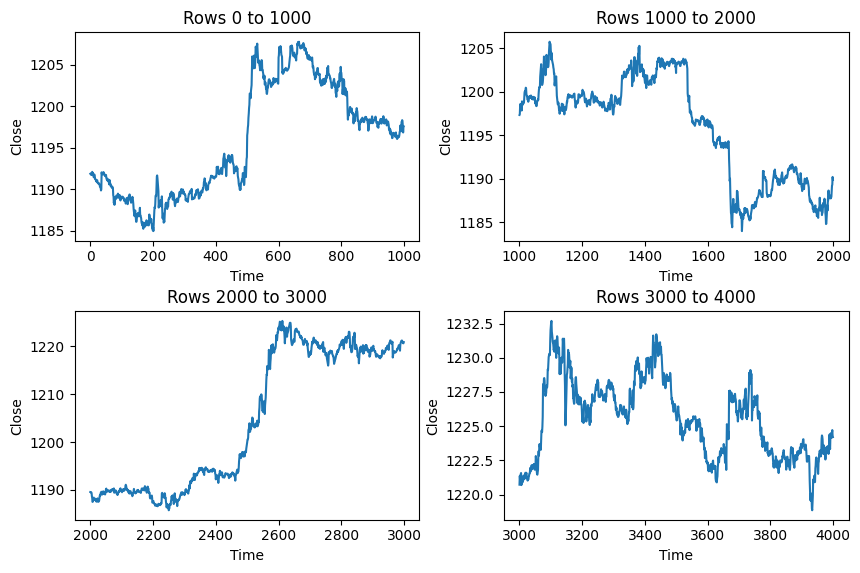

In [26]:
step_size = 1000

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
fig.tight_layout(pad=3.0)

for i in range(4):
    start = i * step_size
    end = start + step_size
    row = i // 2
    col = i % 2

    axs[row, col].plot(df['close'][start:end])
    axs[row, col].set_title(f'Rows {start} to {end}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Close')

plt.show()

In [30]:
n = len(df)
n_train_samples = int(n*TRAIN_RATIO)
n_val_samples = int(n*VALIDATION_RATIO)
n_test_sampels = int(n*TEST_RATIO)

train_df = df[0:n_train_samples]
val_df = df[n_train_samples:n_train_samples + n_val_samples]
test_df = df[n_train_samples + n_val_samples:]

train_df.shape, val_df.shape, test_df.shape

((316334, 15), (90381, 15), (45192, 15))

In [32]:
columns_to_exclude = ['year', 'month', 'day', 'hour', 'minute']

columns_to_scale = df.columns.difference(columns_to_exclude)
columns_to_scale

Index(['ADX', 'EMA100', 'EMA20', 'EMA200', 'EMA60', 'RSI', 'close', 'high',
       'low', 'open'],
      dtype='object')

In [37]:
scaler = MinMaxScaler()

train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
val_df[columns_to_scale] = scaler.transform(val_df[columns_to_scale])
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])

In [38]:
train_df.head()

,year,month,day,hour,minute,open,close,high,low,EMA20,EMA60,EMA100,EMA200,RSI,ADX
0,2018,10,1,0,5,0.009261,0.008867,0.008390,0.009549,0.006694,0.005708,0.003855,0.000885,0.534879,0.235149
1,2018,10,1,0,10,0.009024,0.008799,0.007986,0.009955,0.006708,0.005724,0.003887,0.000922,0.521617,0.215866
2,2018,10,1,0,15,0.008777,0.008777,0.007997,0.009978,0.006718,0.005739,0.003918,0.000958,0.517089,0.198395
3,2018,10,1,0,20,0.008777,0.008901,0.007874,0.009640,0.006740,0.005757,0.003952,0.000995,0.541671,0.188430
4,2018,10,1,0,25,0.008934,0.008687,0.008065,0.009967,0.006739,0.005768,0.003980,0.001029,0.495633,0.172383


In [44]:
train_df.to_csv(os.path.join(DATA_DEST_PATH, DATA_VERSION, 'train.csv'))
val_df.to_csv(os.path.join(DATA_DEST_PATH, DATA_VERSION, 'val.csv'))
test_df.to_csv(os.path.join(DATA_DEST_PATH, DATA_VERSION, 'test.csv'))